In [1]:
%load_ext autoreload
%autoreload 2
from vulcan import utils

import matplotlib.pyplot as plt

from fibsem import utils as fibsem_utils
from fibsem import milling
from fibsem.structures import MillingSettings
from autoscript_sdb_microscope_client.structures import BitmapPatternDefinition
import vulcan
import os

# path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\gigachad.bmp"
# path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_rect.bmp"


BASE_PATH = os.path.dirname(vulcan.__file__)


In [2]:
microscope, settings = fibsem_utils.setup_session(
    config_path=os.path.join(BASE_PATH, "config"), 
    protocol_path=os.path.join(BASE_PATH, "protocol.yaml"))

2022-10-07 15:03:00,284 — root — INFO — connect_to_microscope:31 — Microscope client connecting to [10.0.0.1]
2022-10-07 15:03:00,293 — root — INFO — connect_to_microscope:34 — Microscope client connected to [10.0.0.1]
2022-10-07 15:03:00,293 — root — INFO — setup_session:252 — Finished setup for session: vulcan_demo_2022-10-07.03-03-00PM


Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


# 200nA
p:1um
o: 0.58
o_step: 0.58um
gap: 0.29um
offset: 0.145um



# 60nA
p: 0.2um
o: 0.87
ostep: 0.74um
gap: 0.087um
cos : 0.0435



p: 0.65um
o: 0.58
ostep: 0.377
gap: 0.1885
cos: 0.09425


eq:
p = pitch (pixelsize)
o = overlap (percentage)
o_step: beam step size (pitch * overlap)
gap: o_step / 2
cos: gap / 2


In [55]:
0.65*0.58 / 2

0.1885

In [39]:
0.87*0.2 # pitch

0.17400000000000002

2022-10-07 17:52:36,528 — root — INFO — setup_milling:35 — setup ion beam milling
2022-10-07 17:52:36,529 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 8e-05


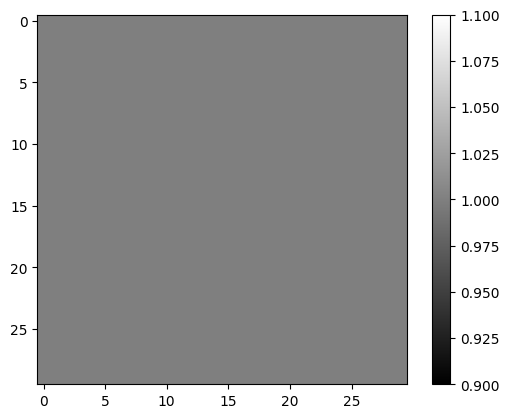

In [74]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=80e-6
)

microscope.patterning.clear_patterns()

import numpy as np

# profile pattern
# np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\1e-06_profile.npy"
# arr = np.load(np_path)

arr = np.ones(shape=(30, 30))

path  = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration/stitching.bmp"
arr = utils.transform_profile(arr, invert=False, rotate=False)
plt.imshow(arr, cmap="gray")
plt.colorbar()
plt.show()
utils.save_profile_to_bmp(arr, path)

# mill_settings = MillingSettings(width =800e-6, height=400e-6, depth=0.6e-6)
# pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

width = 20e-6
offset = 1.4e-6

mill_settings = MillingSettings(centre_x = 0 , width = 2*(width+offset) + 10e-6, height=25e-6, depth=0.6e-6)
rect_pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

bitmap_pattern  =  BitmapPatternDefinition.load(path)
mill_settings = MillingSettings(centre_x = -width/2 - offset, width =width, height=20e-6, depth=2e-6)
pattern1 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
pattern1.scan_direction = "RightToLeft"

bitmap_pattern  =  BitmapPatternDefinition.load(path)
mill_settings = MillingSettings(centre_x = +width/2 + offset, width=width, height=20e-6, depth=2e-6)
pattern2 = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
pattern2.scan_direction = "LeftToRight"

microscope.patterning.mode = "Serial"

In [76]:
from fibsem import acquire
from fibsem.structures import BeamType

settings.image.save_path = r"C:\Users\Admin\Github\vulcan\vulcan\vulcan_demo_2022-10-07.03-03-00PM\60nA"
settings.image.beam_type = BeamType.ELECTRON
settings.image.hfw = 60e-6
settings.image.save = True
settings.image.label = f"st_{offset*1e6}um_offset_serial_r2l_l2r_sm"
image = acquire.new_image(microscope, settings.image)

2022-10-07 18:06:19,067 — root — INFO — autocontrast:27 — automatically adjusting contrast...
2022-10-07 18:06:19,514 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 18:06:21,522 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | -18.933 | 1.000


In [19]:
from fibsem import calibration

calibration.auto_discharge_beam(microscope, settings.image)

2022-10-07 15:48:01,145 — root — INFO — auto_discharge_beam:141 — Bring me Thanos!
2022-10-07 15:48:01,150 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 15:48:01,590 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 27.029 | 1.000
2022-10-07 15:48:01,599 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 15:48:01,950 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 29.468 | 1.000
2022-10-07 15:48:01,956 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 15:48:02,296 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 30.972 | 1.000
2022-10-07 15:48:02,305 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 15:48:02,651 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 31.923 | 1.000
2022-10-07 15:48:02,657 — root — INFO — acquire_image:186 — acquiring new ELECTRON image.
2022-10-07 15:48:02,992 — root — INFO — auto_gamma:86 — AUTO_GAMMA | Electron | 32.948 

### Calibration

Resolution vs Depth

How does changing the resolution of the bitmap pattern affect the depth?

In [ ]:
milling.setup_milling(
    microscope, 
    application_file=settings.system.application_file,
    hfw=400e-6
)

In [ ]:
# paths = range(4)
# paths = [r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_profile.bmp"]
# r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration\1e-06_rect.bmp"]



microscope.patterning.clear_patterns()

width = 800e-6
height = 400e-6
depth = 5e-6
offset = 0e-6
center_x = 0
center_y = -(len(paths) - 1) / 2 * (height + offset) 

mill_settings = MillingSettings(centre_x=center_x, centre_y=0, 
    width=width, 
    height=height, 
    depth=600e-9)

pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)


for path in paths:

    # profile pattern
    bitmap_pattern  =  BitmapPatternDefinition.load(path)
    mill_settings = MillingSettings(centre_x=center_x, centre_y=center_y, width=width, height=height, depth=depth)
    pattern = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)

    print(mill_settings)

    center_y +=  height + offset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration/1e-06_profile.npy"
np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.npy"
arr = np.load(np_path)

print(arr.shape)
plt.plot(arr[0])
plt.show()

# dirname = os.path.dirname(np_path)
# fname = os.path.basename(np_path).split(".")[0]
# fname = np_path.replace("npy", "bmp")
# print(fname)

arr = utils.transform_profile(arr, invert=True, rotate=False)
utils.save_profile_to_bmp(arr, fname)

In [ ]:
print("30x: ", arr.shape[1] * 30)
print("100x (10nm): ", arr.shape[1] * 100)
print("1000x (1nm): ", arr.shape[1] * 1000)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import tifffile as tf
import numpy as np

path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\helloworld.tif"

utils.convert_tif_to_bmp(path, "pattern.bmp")

plt.imshow(arr)
plt.show()

In [ ]:
x = "Hello world"
print(str(x))


In [ ]:

arr = np.ones(shape=(200, 40))
path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration"
fname = os.path.join(path, f"{arr.shape[0]}.{arr.shape[1]}.bmp")
utils.save_profile_to_bmp(arr, fname)

print("elements: ", arr.size)
# microscope.patterning.clear_patterns()

width = 40e-6
height = 20e-6
depth_step = 3e-6
offset = 30e-6
center_x = 0
center_y = -(2 - 1) / 2 * (height + offset) 

# center_y = 0
# mill_settings = MillingSettings(centre_x=center_x, centre_y=0, 
#     width=width, 
#     height=height, 
#     depth=600e-9)

# pattern = milling._draw_rectangle_pattern_v2(microscope, mill_settings)

depth = 2e-6

for i in range(2):

    # profile pattern
    bitmap_pattern  =  BitmapPatternDefinition.load(fname)
    mill_settings = MillingSettings(centre_x=center_x, centre_y=center_y, width=width, height=height, depth=depth)
    pattern = milling._draw_bitmap_pattern(microscope, mill_settings, bitmap_pattern)
    
    center_y +=  height + offset
    depth += depth_step

    print("depth: ", pattern.depth)
    print("passes: ", pattern.pass_count)
    print("vol per dose: ", pattern.volume_per_dose)
    print("dose: ", pattern.dose)


In [ ]:
pattern.dose *= 2.5

In [ ]:
pattern.depth


In [ ]:
rect_pattern.dose

In [ ]:
pattern.depth

In [ ]:
pattern.dwell_time

In [ ]:
import numpy as np

arr = np.ones(shape=(200, 200))

fname = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\calibration/1um.bmp"
arr = utils.transform_profile(arr, invert=False, rotate=False)
utils.save_profile_to_bmp(arr, fname)

(200, 881)


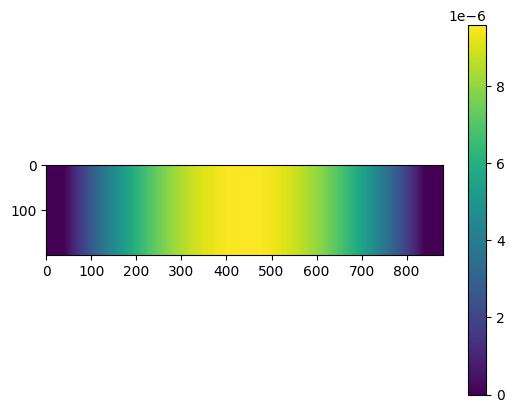

In [44]:
np_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.npy"
arr = np.load(np_path)

print(arr.shape)
plt.imshow(arr)
plt.colorbar()
plt.show()

(881, 200)


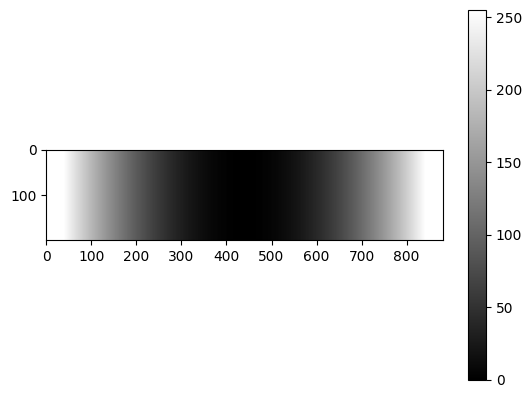

In [47]:
img_path = r"C:\Users\Admin\Github\vulcan\vulcan\profiles\lens_lowres_half.bmp"

from PIL import Image

img = Image.open(img_path)

print(img.size)
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()